In [1]:
import math
import numpy as np
import matplotlib.pyplot as plt
from scipy import linalg
from scipy.interpolate import spline

np.set_printoptions(precision=4)   #设置矩阵显示数据的显示精度

#定义预设变量
k = 3 #曲线次数，k=3即，选区3次曲线
m = 34 #m值为通过的型值点的个数
n = m + k - 1#控制顶点数
nj = n + k + 1 #节点矢量总个数,如果通过的数据点数是n，则控制点数为n+2， 节点矢量为控制点数+次数+1，即，n+k+3
hx = k + 1 #常将两端点处重复度取为k+1


In [13]:
#测试数据
px = np.array([8.0, 8.0215, 8.0237, 8.0445, 8.0471, 8.0820, 8.0879, 8.1262, 8.1298, 8.1746, 8.1727, 8.2567, 8.2558, 8.3437, 8.3479, 8.4271, 8.4290, 8.5145, 8.5127, 8.6828, 8.6856, 8.8529, 8.8573, 9.0278, 9.0269, 9.195, 9.1982, 9.3686, 9.3697, 9.5356, 9.5329, 9.613, 9.6179, 9.6548, 9.7149])
py = np.array([0.0, 0.0463, -0.0298, 0.0648, -0.0226, 0.0858, -0.0338, 0.0946, -0.0427, 0.1046, -0.0494, 0.1223, -0.0565, 0.1256, -0.0642, 0.1262, -0.0776, 0.1283, -0.0779, 0.1291, -0.0767, 0.1090, -0.0737, 0.0949, -0.0628, 0.0749, -0.0574, 0.0539, -0.0349, 0.0244, -0.0210, 0.0130, -0.0130, 0.0172, 0.0])

#px = np.array([0.0000, 0.0212, 0.0212, 0.0425, 0.0425, 0.0850, 0.0850, 0.1275, 0.1275, 0.17, 0.17, 0.255, 0.255, 0.34, 0.34, 0.425, 0.425, 0.51, 0.51, 0.68, 0.68, 0.85, 0.85, 1.02, 1.02, 1.19, 1.19, 1.36, 1.36, 1.53, 1.53, 1.615, 1.615, 1.655, 1.7 ])
#py = np.array([0.0000, 0.0454, -0.0209, 0.0614, -0.0291, 0.0835, -0.0384, 0.0986, -0.0444, 0.1093, -0.0496, 0.1222, -0.0595, 0.1275, -0.0675, 0.1292,-0.0727, 0.1284, -0.0758, 0.1214, -0.0761, 0.1090, -0.0709, 0.0969, -0.0624, 0.0741, -0.0510, 0.0524,-0.0367, 0.0286, -0.0209, 0.0156, -0.0119, 0.0167, 0.0000])



print('X data size is: ', px.size)
print('Y data size is: ', py.size)

#定义型值点
Q = []
for i in range(m+1):
    Q.append((px[i], py[i]))
    
print('Q列表的值为：')
print(Q)

X data size is:  35
Y data size is:  35
Q列表的值为：
[(8.0, 0.0), (8.0215, 0.0463), (8.0237, -0.0298), (8.0445, 0.0648), (8.0471, -0.0226), (8.082, 0.0858), (8.0879, -0.0338), (8.1262, 0.0946), (8.1298, -0.0427), (8.1746, 0.1046), (8.1727, -0.0494), (8.2567, 0.1223), (8.2558, -0.0565), (8.3437, 0.1256), (8.3479, -0.0642), (8.4271, 0.1262), (8.429, -0.0776), (8.5145, 0.1283), (8.5127, -0.0779), (8.6828, 0.1291), (8.6856, -0.0767), (8.8529, 0.109), (8.8573, -0.0737), (9.0278, 0.0949), (9.0269, -0.0628), (9.195, 0.0749), (9.1982, -0.0574), (9.3686, 0.0539), (9.3697, -0.0349), (9.5356, 0.0244), (9.5329, -0.021), (9.613, 0.013), (9.6179, -0.013), (9.6548, 0.0172), (9.7149, 0.0)]


In [14]:
#已经计算出的控制定点坐标
dx = np.array([0.0000, 0.0060, 0.0180, 0.0493, 0.0846, 0.1275, 0.1841, 0.2549, 0.3399, 0.4249, 0.5383, 0.6800, 0.8501, 1.0199, 1.1908, 1.3576, 1.5090, 1.6025, 1.7489, 1.6024, 1.5091, 1.3577, 1.1905, 1.0205, 0.8499, 0.6802, 0.5384, 0.4250, 0.3399, 0.2546, 0.1835, 0.1269, 0.0836, 0.0485, 0.0129, 0.0043, 0.0000])
dy = np.array([0.0000, -0.0073, -0.0220, -0.0312, -0.0390, -0.0444, -0.0514, -0.0598, -0.0680, -0.0731, -0.0772, -0.0771, -0.0713, -0.0629, -0.0516, -0.0369, -0.0239, -0.0123, -0.0010, 0.0165, 0.0325, 0.0532, 0.0728, 0.1002, 0.1077, 0.1228, 0.1282, 0.1297, 0.1280, 0.1235, 0.1132, 0.0991, 0.0842, 0.0655, 0.0429, 0.0143, 0.0000])


In [15]:
S = 0
num = 0

#定义节点矢量数组
U = [] 
L = []  #存储计算的每段的弦长



    
#计算总弦长
for i in range(1, m+1):
    x = px[i] - px[i-1]
    y = py[i] - py[i-1]
    l = math.sqrt(x*x + y*y)
    #print('the every length is :', l)
    L.append(l)
    S = S + l
    num = num + 1
    
print('各段线段长度列表为： ')
print(L)
#print(len(L))
print('总线段长度为：')
print(S)


各段线段长度列表为： 
[0.051048408398303505, 0.07613179362132486, 0.09685969233897028, 0.08743866421669538, 0.11387962943388964, 0.11974543832647648, 0.13399048473679057, 0.13734718781249217, 0.15396210572735108, 0.15401172033322658, 0.19114625290598805, 0.17880226508632377, 0.20220489608315595, 0.18984646428100782, 0.20621542134379772, 0.2038088565298378, 0.222946316408233, 0.20620785630038443, 0.26792351520536584, 0.20581904673766224, 0.24994755449893824, 0.18275297535197615, 0.23978367333911535, 0.15770256814649533, 0.21729910262124938, 0.13233869426588732, 0.20352849923290905, 0.08880681280172147, 0.17617973776799703, 0.04548021547882117, 0.08701729713108752, 0.026457702092207665, 0.04768280612547825, 0.06251279868954862]
总线段长度为：
5.1168264533707095


In [16]:
#计算从k+1-n的其余节点矢量，3次的计算方法
def countUDirect(n, k, S, L, U):
    nu = 0
    #添加前k+1个节点矢量
    for a in range(k+1):
        U.append(0.0)
    
    for j in range(k+1, n+1):
        a = (k+1)/2 + nu
        l = L[0:int(a)-1]
        print('每个l的值', l)
        u = sum(l) / S
        U.append(u)
        nu = nu + 1
        print('单个节点和计算： ', sum(l))
        print('单个节点矢量计算：', u)
        
    #增加最后k+1）个节点矢量
    for k in range(k+1):
        U.append(1.0)



countUDirect(n, k, S, L, U)
print('节点向量列表为：')
print(U)
print('节点矢量的数量为：')
print(len(U))

每个l的值 [0.051048408398303505]
单个节点和计算：  0.051048408398303505
单个节点矢量计算： 0.009976576079627514
每个l的值 [0.051048408398303505, 0.07613179362132486]
单个节点和计算：  0.12718020201962837
单个节点矢量计算： 0.024855289343622043
每个l的值 [0.051048408398303505, 0.07613179362132486, 0.09685969233897028]
单个节点和计算：  0.22403989435859867
单个节点矢量计算： 0.04378493122646604
每个l的值 [0.051048408398303505, 0.07613179362132486, 0.09685969233897028, 0.08743866421669538]
单个节点和计算：  0.31147855857529405
单个节点矢量计算： 0.06087338732587023
每个l的值 [0.051048408398303505, 0.07613179362132486, 0.09685969233897028, 0.08743866421669538, 0.11387962943388964]
单个节点和计算：  0.4253581880091837
单个节点矢量计算： 0.08312929740444469
每个l的值 [0.051048408398303505, 0.07613179362132486, 0.09685969233897028, 0.08743866421669538, 0.11387962943388964, 0.11974543832647648]
单个节点和计算：  0.5451036263356601
单个节点矢量计算： 0.10653158384462563
每个l的值 [0.051048408398303505, 0.07613179362132486, 0.09685969233897028, 0.08743866421669538, 0.11387962943388964, 0.11974543832647648, 0.13399048473679

In [22]:
#论文计算的节点矢量，用于测试
# U = [0.0, 0.0, 0.0, 0.0, 0.0068, 0.0125, 0.0281, 0.0410, 0.0530, 0.0769, 0.1021, 0.1259, 0.1511, 0.1995, 0.2490, 0.2981, 0.3469, 0.3959, 0.4449, 0.4709, 0.4950, 0.5189, 0.5450, 0.5940, 0.6429, 0.6930, 0.7422, 0.7925, 0.8410, 0.8650, 0.8889, 0.9141, 0.9379, 0.9522, 0.9639, 0.9765, 0.9853, 1.0, 1.0, 1.0, 1.0]
# print('U节点向量的数量：', len(U))
# print(U)

A = []
B = []
C = []
E = []
F = []

#求解控制点矩阵替代值
for i in range(1, m+1):
    if (U[i+3]-U[i] == 0.0):
        A.append(0.0)
    else:
        A.append(((U[i+3]-U[i+2])*(U[i+3]-U[i+2]))/(U[i+3]-U[i]))
        
    if ((U[i+4]-U[i+1] == 0.0) and (U[i+3]-U[i] == 0.0)):
        B.append(0.0)
        
    if ((U[i+4]-U[i+1] == 0.0) and (U[i+3]-U[i] != 0.0)):
        B.append(((U[i+3]-U[i+2])*(U[i+2]-U[i]))/(U[i+3]-U[i]))
        
    if((U[i+3]-U[i] == 0) and (U[i+4]-U[i+1] != 0.0)):
        B.append(((U[i+2]-U[i+1])*(U[i+4]-U[i+2]))/(U[i+4]-U[i+1]))
        
    if ((U[i+4]-U[i+1] != 0.0) and (U[i+3]-U[i] != 0.0)):
        B.append((((U[i+3]-U[i+2])*(U[i+2]-U[i]))/(U[i+3]-U[i])) + (((U[i+2]-U[i+1])*(U[i+4]-U[i+2]))/(U[i+4]-U[i+1])))
    
    if (U[i+4]-U[i+1] == 0.0):
        C.append(0.0)
    else:
        C.append(((U[i+2]-U[i+1])*(U[i+2]-U[i+1]))/(U[i+4]-U[i+1]))
    #E.append((U[i+3]-U[i+1])*px[i-1])
    #F.append((U[i+3]-U[i+1])*py[i-1])

for i in range(1, m+1):
    E.append((U[i+3]-U[i+1])*px[i-1])
    F.append((U[i+3]-U[i+1])*py[i-1])
    
print('A的个数为：', len(A))
print(A)
print('B的个数为：', len(B))
print(B)
print('C的个数为：', len(C))
print(C)
print('***************************************************************************************************************')
print('E的个数为：', len(E))
print(E)
print('F的个数为：', len(F))
print(F)


U节点向量的数量： 41
[0.0, 0.0, 0.0, 0.0, 0.0068, 0.0125, 0.0281, 0.041, 0.053, 0.0769, 0.1021, 0.1259, 0.1511, 0.1995, 0.249, 0.2981, 0.3469, 0.3959, 0.4449, 0.4709, 0.495, 0.5189, 0.545, 0.594, 0.6429, 0.693, 0.7422, 0.7925, 0.841, 0.865, 0.8889, 0.9141, 0.9379, 0.9522, 0.9639, 0.9765, 0.9853, 1.0, 1.0, 1.0, 1.0]
A的个数为： 34
[0.0068, 0.0025992000000000007, 0.00866049822064057, 0.004865789473684212, 0.003555555555555554, 0.01170512295081967, 0.010393453355155484, 0.007770096021947882, 0.008558490566037734, 0.024050924024640655, 0.019904549147034923, 0.016400068027210873, 0.016156309362279523, 0.016344452008168815, 0.016355585831062693, 0.005451612903225793, 0.005860847628657925, 0.007719054054054074, 0.009193117408906885, 0.024252525252525192, 0.019283951612903267, 0.016959527027026983, 0.01633360323886641, 0.01691236631016044, 0.015893581081081073, 0.004690553745928346, 0.00592541493775935, 0.00868727770177838, 0.007770096021947832, 0.0032304897314376383, 0.0027487951807228625, 0.0041129533678

In [23]:
#计算闭合曲线的系数矩阵，并计算控制顶点

dd = np.eye(n-2)

print('dd is :')
print(dd)
print('dd shape is ', dd.shape)

#进行矩阵的赋值


for i in range(0, n-2):
    dd[i,i] = B[i]
    
for i in range(0, n-3):
    dd[i+1, i] = A[i+1]
    
for i in range(0, n-3):
    dd[i, i+1] = C[i]
    
dd[0, n-3] = A[0]
dd[n-3, 0] = C[n-3]

print('A is ')
print(A)
print('B is ')
print(B)
print('C is ')
print(C)
    
print('进行矩阵赋值后的DD为：')
print(dd)
print(dd.shape)
print('**********************************************************************')
print('E is ')
print(E)
print(np.array(E).shape)
print(np.array(F).shape)

eex = []
for i in range(0, n-2):
    eex.append(E[i])
eey = []
for i in range(0, n-2):
    eey.append(F[i])

eex = np.array(eex)
eey = np.array(eey)

print('E matrix is ', eex)
print('E 矩阵个数： ', eex.shape)
print('F matrix is ', eey)
print('F 矩阵个数： ', eey.shape)

print('求dd的逆矩阵为：')
print(linalg.inv(dd))

wd_x = linalg.solve(dd,eex)
WDX = []
WDX.append(px[0])
for i in range(n-2):
    WDX.append(wd_x[i])
WDX.append(wd_x[0])
WDX.append(wd_x[1])

print('处理前的wdx为： ')
print(wd_x)
print('求解后的控制顶点X坐标为：')
print(WDX)
print('控制顶点的维数：', np.array(WDX).shape)

wd_y = linalg.solve(dd, eey)
WDY = []
WDY.append(py[0])
for i in range(n-2):
    WDY.append(wd_y[i])
WDY.append(wd_y[0])
WDY.append(wd_y[1])

print('处理前的wd_y为： ')
print(wd_y)
print('求解后的控制顶点Y坐标为：')
print(WDY)
print('控制顶点的维数为：', np.array(WDY).shape)

#D_data = []
print('控制点的数据点为： ')
for i in range(n-1):
    #D_data.append((WDX[i], WDY[i]))
    print('{0:.4f}, {1:.4f}'.format(WDX[i], WDY[i]))




dd is :
[[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
dd shape is  (34, 34)
A is 
[0.0068, 0.0025992000000000007, 0.00866049822064057, 0.004865789473684212, 0.003555555555555554, 0.01170512295081967, 0.010393453355155484, 0.007770096021947882, 0.008558490566037734, 0.024050924024640655, 0.019904549147034923, 0.016400068027210873, 0.016156309362279523, 0.016344452008168815, 0.016355585831062693, 0.005451612903225793, 0.005860847628657925, 0.007719054054054074, 0.009193117408906885, 0.024252525252525192, 0.019283951612903267, 0.016959527027026983, 0.01633360323886641, 0.01691236631016044, 0.015893581081081073, 0.004690553745928346, 0.00592541493775935, 0.00868727770177838, 0.007770096021947832, 0.0032304897314376383, 0.0027487951807228625, 0.004112953367875676, 0.0023395770392748883, 0.005985872576177319]
B is 
[0.0, 0.008255248398576512, 0.011689501779359431, 0.01762532163742690

[0.0, 0.0, 0.0, 0.0, 0.0068, 0.0125, 0.0281, 0.041, 0.053, 0.0769, 0.1021, 0.1259, 0.1511, 0.1995, 0.249, 0.2981, 0.3469, 0.3959, 0.4449, 0.4709, 0.495, 0.5189, 0.545, 0.594, 0.6429, 0.693, 0.7422, 0.7925, 0.841, 0.865, 0.8889, 0.9141, 0.9379, 0.9522, 0.9639, 0.9765, 0.9853, 1.0, 1.0, 1.0, 1.0]


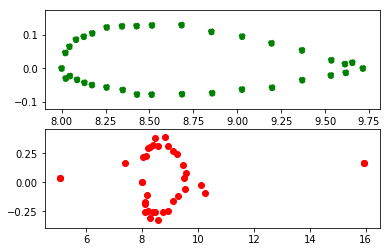

In [26]:
#对数据点进行显示
#fig = plt.figure()
# ax = plt.axes()

fig,ax = plt.subplots(2)

ax[0].scatter(px, py, color='green', linestyle='dashed')
#ax[0].scatter(dx, dy, color='red')
ax[1].scatter(WDX, WDY, marker='o', color='red')

print(U)

plt.show()


In [25]:
k = [1, 3, 5, 4]
u = k[0:1]
u

[1]

In [5]:
A = np.array([[1, 4], [8, 5]])
K = np.linalg.inv(A)

print(A)
print(K)
print(A.dot(K))

[[1 4]
 [8 5]]
[[-0.1852  0.1481]
 [ 0.2963 -0.037 ]]
[[1. 0.]
 [0. 1.]]
